In [1]:
import numpy as np
data = np.loadtxt("fnu.txt")
import math


In [2]:
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15

t_0 = data[:,0]
F_nu = data[:,1]

theta_0 = math.pi/18
E_52 = 80
n_0 = 1 
z = 1
theta_obs = 3*theta_0
nu_0 = 1*pow(10,14)
D = Planck15.luminosity_distance(z=1).cgs.value

t_jet = 6.2*(1+z)*((E_52/n_0)**(1/3))*((theta_0/0.1)**(8/3))

gamma = (theta_0**(-1))*((t_0/t_jet)**(-1/2))   #equation for t_0 > t_jet
a = 1/((1+gamma**2)*(theta_obs**2))



t_days = t_0/(86400)


[5.71494874e-28 3.20196269e-27 6.64785774e-27 ... 5.25799180e-35
 5.25799189e-35 5.25799197e-35]


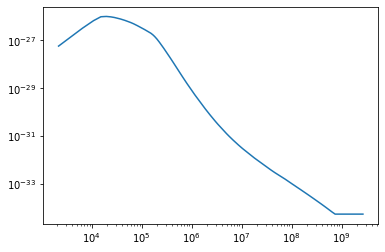

In [17]:
#The off-axis light curve with both the arbitrary frequency and time functions combined

def F(nu, t):
    
    Fnu_interp = np.interp(t, t_0, F_nu)
    
    Fnu_combined = (nu*Fnu_interp)/(nu_0)

    
    return Fnu_combined

Fnu_off = (a**3)*F(nu_0/a, a*t_0)
L_off = 4*math.pi*(D**2)*nu_0*Fnu_off

print(Fnu_off)     #example

plt.plot(t_0, Fnu_off)
plt.xscale('log')
plt.yscale('log')
